# COGS 189 FINAL PROJECT

By: Matthew Morgan


Team Name: N-art

## Introduction and Motivation

This main goal of this project is to use EEG-Art visualization techniques to visualize EEG data in a pleasing manner. This is useful for displaying EEG data in a user-friendly environment such as indicating attention spans in a class setting or displaying emotional states of mind for users who can not signal emotional states. It is important to convey these states of mind for better studies on how to foster attention, and also having the ability to convey emotions without physical ques. 

This project will mainly focus on meditation data combined with attention and eeg data. 

## Data description

This project will mainly focus on meditation data combined with attention and eeg data. The data includes attention, meditation, and raw EEG data. Participants listened to 120 seconds of a song and their eeg, attention, and meditation EEG data was recorded for each song. The songs are (in order of ID): Fur Elise, Show&Tell, Boot Scootin Boogie, and Mo Bamba. 
They listened to the same 120 seconds of each song again but for each 10 second segment of the song, they were asked to record their emotion (Relaxed/0 or Energized/1).

<br>Data was sampled 128 times per second for 120 seconds resulting in 15,360 samples per song.
<br>Fs = 128
<br>dt = 1./Fs 
<br>Max time = 120

Credits to Lulu Ricketts, Catherine Wang, Vicky Vo (Team musicEEGart) for collecting and providing the data!

## Related Work

EEGNET: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0138297
<br> Neurosky Apps: http://neurosky.com/2015/11/beautiful-brainwaves-creating-eeg-art/
<br> Numpy art: https://medium.com/@patrickbfuller/numpy-art-a-tutorial-in-scatter-fun-634f79628435
<br> Perlin noise: https://pypi.org/project/perlin-noise/#description
<br> Color Selection: https://www.designhill.com/design-blog/use-warm-cool-colors-logo-design/

## Methods

EEG data to art processing code:

In [122]:
#data vis esentials
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#for data manipulating from files
import json
import os
import glob
import pprint

#filtering/processing imports:                   
import matplotlib.patches as patches
import scipy.signal as signal
from scipy.signal import butter, sosfilt, sosfreqz  
from scipy.io import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from pathlib import Path

In [140]:
#import json EEG data and store in a dictionary of dataframes
path = './musicEEGart/DataCollection/data/eeg_data'
samples = {}
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.  
    fname = filename
    filename = filename.split('/')
    filename = filename[5]
    filename = filename.split('.')
    filename = filename[0]
    samples[filename] = pd.read_json(fname)

samples['user1song1']['raw_eeg']
#samples['user1song1']['meditation']
data1 = samples['user1song1']['raw_eeg']
#data1

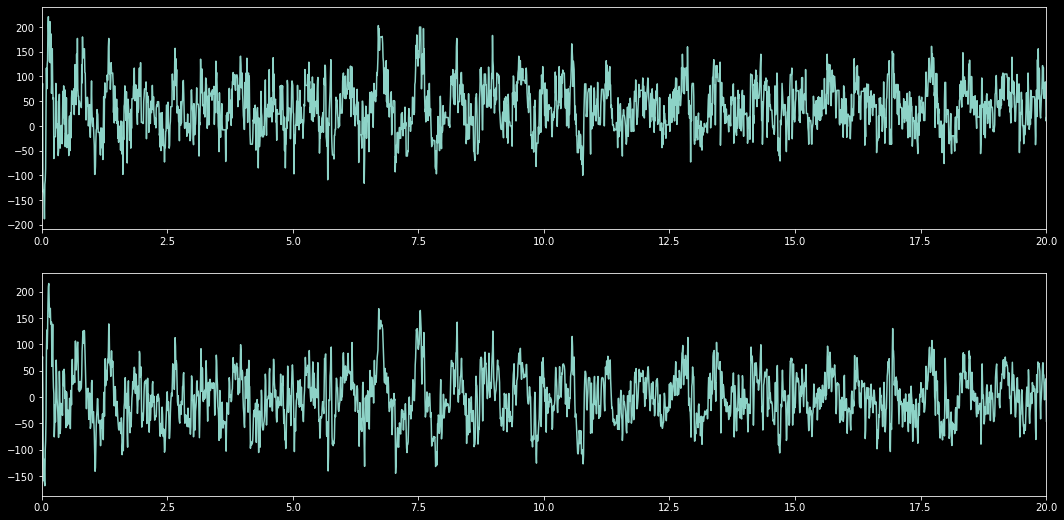

In [144]:
#filter data:

# Define our filter variables
fs = 128.0                      # Hz; sampling rate
#dt = 1000/fs                    # ms; time between samples
#sdt = np.round(dt).astype(int); # rounded dt so that we can index samples
hp = 0.1                        # Hz; our low cut for our bandpass
lp = 45                      # Hz; our high cut for our bandpass
order = 3                       # filter order (functionally doubled)

# Create our filter coefficient as as a second-order section
sos = butter(order, [hp, lp], analog = False, btype = 'band', output = 'sos', fs = fs)

#dict of filtered EEG data for all samples
filteredSamples = {}

#filtering the data:
for k,v in samples.items():
    data1 = samples[k]['raw_eeg']
    filteredEEG = sosfilt(sos, samples[k]['raw_eeg'])
    filteredSamples[k] = filteredEEG
    #fig,ax = plt.subplots(2,1, figsize=(12,6))

fig,ax = plt.subplots(2,1, figsize=(18,9))
ax[0].plot(np.arange(0,120,1/fs), samples['user1song1']['raw_eeg'])
ax[1].plot(np.arange(0,120,1/fs), filteredSamples['user1song1'])
ax[0].set_xlim([0,20])
ax[1].set_xlim([0,20])
plt.show()
#example of first sample (top graph is filtered, bottom is unfiltered)

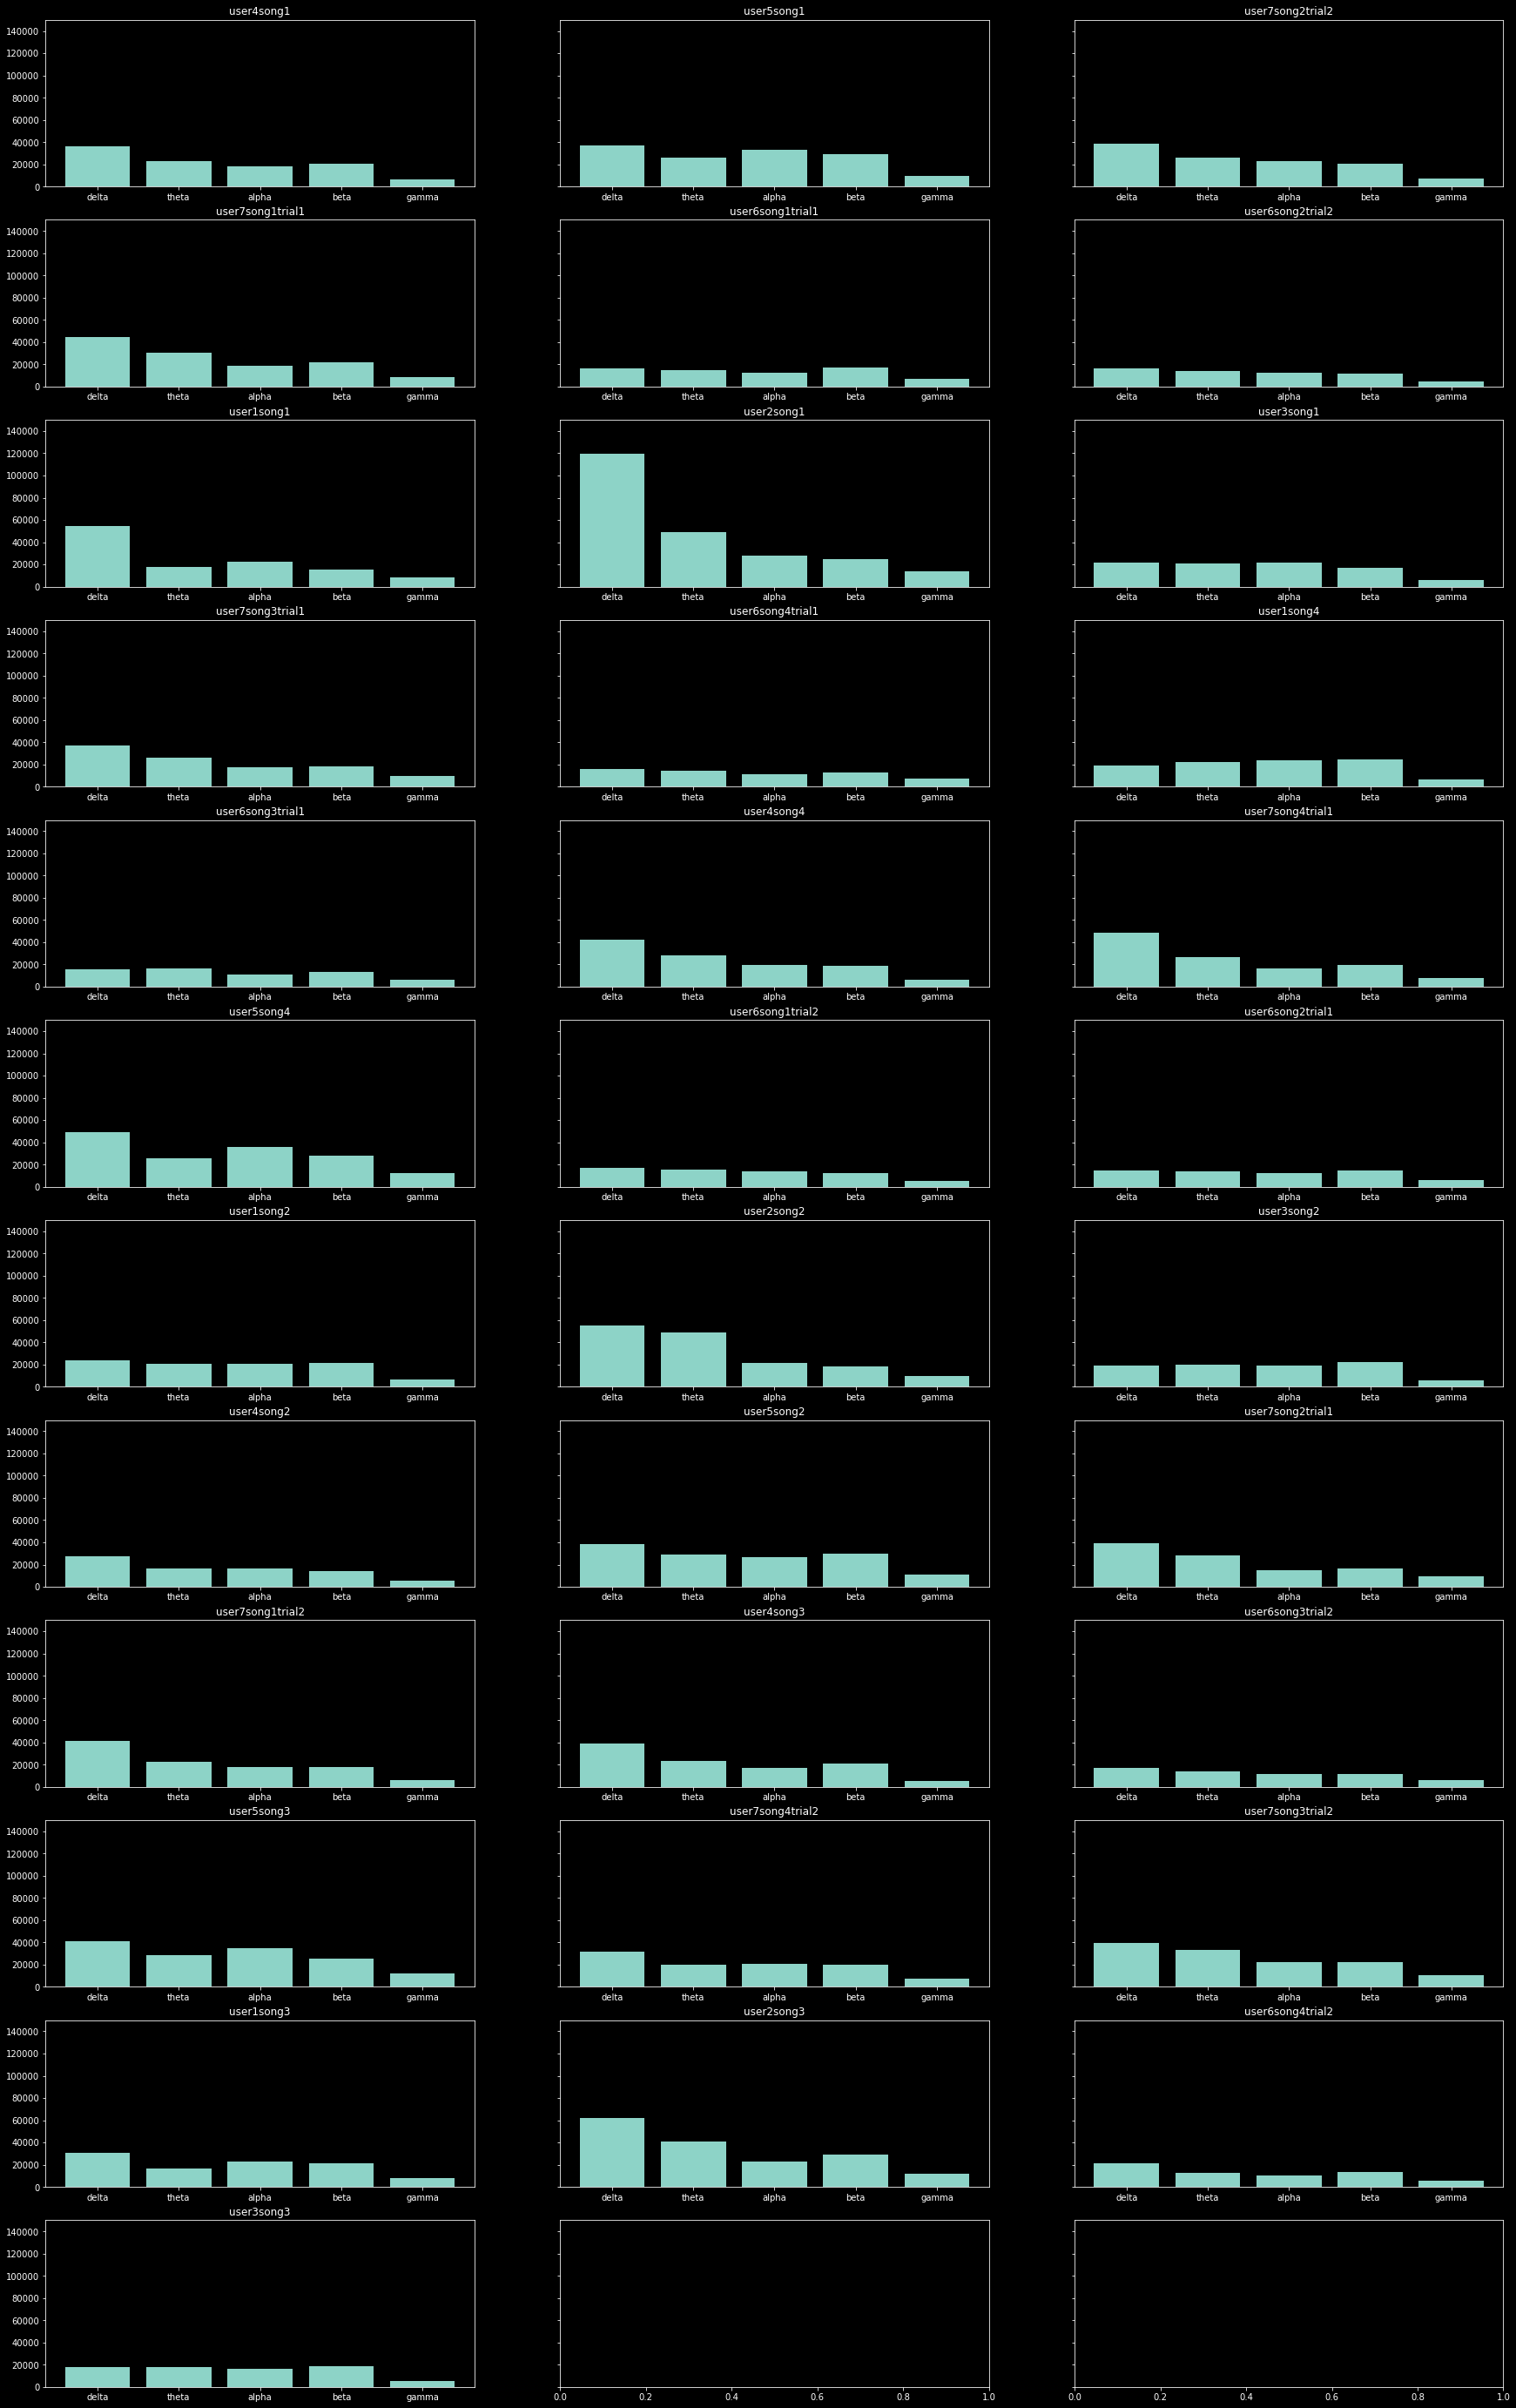

In [197]:
#extract features (bands)
fig,ax = plt.subplots(12,3, figsize=(30,50), sharey=True)
fs = 128
eeg_bands  = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

count = 0
EEGbands = {}
for k,v in filteredSamples.items():
    data = filteredSamples[k]
    fft_vals = np.absolute(np.fft.rfft(data))
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)
    # Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.max(fft_vals[freq_ix])

    # Plot the data (using pandas here cause it's easy)
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    EEGbands[k] = df
    ax[int(count/3),(count % 3)].bar(range(5),df['val'])#.bar(range(4), df'val', title=k, legend=False)
    ax[int(count/3),count%3].set_xticklabels([0,'delta','theta','alpha','beta', 'gamma'])
    ax[int(count/3),count%3].set_title(k)
    ax[int(i/3),i%3].set_ylim([0,150000])
    #ax[count].set_xlabel("EEG band")
    #ax[count].set_ylabel("band Amplitude")
    count += 1
    
    
Credits to https://dsp.stackexchange.com/questions/45345/how-to-correctly-compute-the-eeg-frequency-bands-with-python


In [199]:
#EEGbands

In [ ]:
#creating variables to visualize the data

#color scheme:
coolColors = 
warmColors = 
#point shapes:
circleShape = 'circle'

#opaqcity:


#background color:



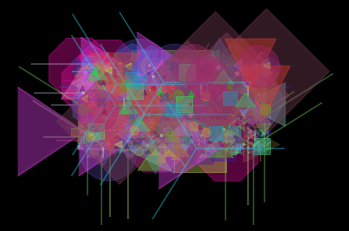

In [200]:

markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', 
           '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', 
           '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 
           'H': 'hexagon2', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', 
           '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 
           3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase',
           9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', 
           ' ': 'nothing', '': 'nothing'}
plt.axis('off')
plt.style.use('dark_background')
for _ in range(1000):
    a = np.random.randint(0,1000,5)
    b = np.random.randint(0,1000,5)
    rgba = [np.random.random() for _ in range(4)]
    color = np.array([rgba])
    marker = np.random.choice(list(markers.keys()))
    alpha = np.random.random()**2.5
    size = np.random.exponential()**5.3
    plt.scatter(a,b, alpha=0.4, marker=marker,
               color=color, s=size)


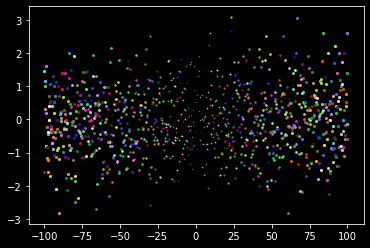

In [20]:


xs = np.linspace(-100,100,1000)
for x in xs:
    rgb = [np.random.random() for _ in range(3)]
    color = np.array([rgb])
    plt.scatter(x,np.random.normal(),
               s = (np.abs(x))/20,
               c = color)

## Results

t

## Discussion

t